In [49]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [18]:
sess = tf.InteractiveSession()

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [13]:
rand_a = np.random.uniform(0, 100, [5, 5])
rand_a

array([[98.73127505,  2.33054924, 54.80804459, 56.09078944,  7.47546877],
       [89.2271009 , 11.06229115, 62.5773451 , 10.08496185, 71.08527892],
       [88.13295051, 69.5289963 , 26.6172699 , 90.99637999, 57.96183625],
       [35.9686895 , 85.26342377, 24.61792126, 78.04441055,  4.55096612],
       [88.50411885, 27.64212207, 58.09244012, 91.06622627, 99.25910465]])

In [25]:
rand_b = np.random.uniform(0, 100, [5, 5])
rand_b

array([[26.41616298, 64.72134808, 46.29853964, 63.10071521, 51.12362996],
       [22.23808858, 73.44953888, 79.96613662, 87.66216587, 30.26238018],
       [60.92716651,  8.50010836, 31.91778261, 81.54992171, 87.24064209],
       [89.07075521, 68.99099023, 91.59605446, 40.71952725, 16.26102882],
       [18.40911037, 22.37712103,  0.11886612, 22.67816889, 93.09794167]])

In [26]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [27]:
op_add = a + b
op_mult = a * b

In [29]:
print(sess.run(op_add, feed_dict = {a: rand_a, b: rand_b}))

[[125.14744   67.0519   101.10658  119.191505  58.5991  ]
 [111.465195  84.51183  142.54349   97.74712  101.347664]
 [149.06012   78.029106  58.53505  172.5463   145.20248 ]
 [125.039444 154.25441  116.213974 118.76394   20.811995]
 [106.91323   50.01924   58.211308 113.74439  192.35704 ]]


In [30]:
print(sess.run(op_mult, feed_dict = {a: rand_a, b: rand_b}))

[[2.6081016e+03 1.5083630e+02 2.5375322e+03 3.5393689e+03 3.8217310e+02]
 [1.9842402e+03 8.1252020e+02 5.0040684e+03 8.8406958e+02 2.1512100e+03]
 [5.3696909e+03 5.9100403e+02 8.4956421e+02 7.4207476e+03 5.0566279e+03]
 [3.2037583e+03 5.8824077e+03 2.2549045e+03 3.1779316e+03 7.4003387e+01]
 [1.6292822e+03 6.1855109e+02 6.9052234e+00 2.0652153e+03 9.2408174e+03]]


# Example Neural Network

In [31]:
n_features = 10
n_dense_neurons = 3

In [32]:
x = tf.placeholder(tf.float32, [None, n_features])

In [33]:
w = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

In [34]:
mult = tf.matmul(x, w)
add = tf.add(mult, b)
z = tf.sigmoid(add)

In [36]:
sess.run(tf.global_variables_initializer())
sess.run(z, feed_dict = {x: np.random.random([1, n_features])})

array([[0.7510842 , 0.86174095, 0.96677935]], dtype=float32)

# Simple Regression

In [47]:
x = np.linspace(1, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
x

array([ 2.33035115,  1.93346077,  1.592531  ,  4.27635851,  4.51031961,
        6.01242343,  5.57123802,  7.43490911, 10.07266948,  9.71787039])

In [48]:
y = np.linspace(1, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
y

array([1.22766708, 2.57347119, 4.09155222, 5.00054033, 5.80406947,
       5.36001089, 6.41747329, 8.97771188, 9.21222635, 9.24439096])

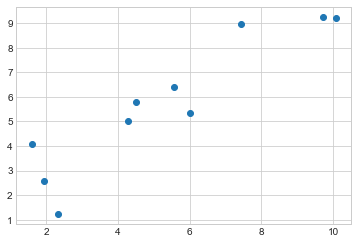

In [55]:
plt.scatter(x, y)

y = wx + b

In [56]:
w = tf.Variable(0.40)
b = tf.Variable(0.80)

In [59]:
error = 0
for i, j in zip(x, y):
    
    y_hat = w*i + b
    
    error += (y_hat - j)**2

In [61]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train_step = optimizer.minimize(error)

In [62]:
sess.run(tf.global_variables_initializer())

In [63]:
iterations = 100
for i in range(iterations):
    sess.run(train_step)

In [66]:
print("Final Weight = "+str(sess.run(w)))
print("Final Intercept = "+str(sess.run(b)))

Final Weight = 0.8802656
Final Intercept = 1.0253615


In [67]:
weight_final = sess.run(w)
intercept_final = sess.run(b)

In [77]:
x_test = np.linspace(1, 11, 10)

y_testPred = weight_final*x_test + intercept_final

y_testPred

array([ 1.90562713,  2.88370001,  3.86177289,  4.83984578,  5.81791866,
        6.79599154,  7.77406442,  8.7521373 ,  9.73021019, 10.70828307])

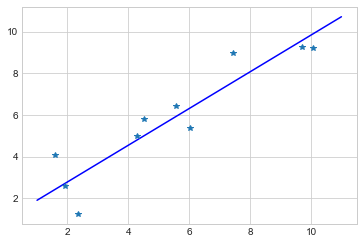

In [78]:
plt.plot(x_test, y_testPred, 'blue')
plt.plot(x, y, '*')